In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#import 
df = pd.read_csv('drinkMenu.csv')

In [3]:
df.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330


In [4]:
df.tail(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [5]:
df.shape

(242, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

from above:<br/>
<ul>
  <li>To answer given questions I am only intrested in Sugars, beverage and Calories columns.</li>
  <li>string datatype for numerical values (%, g, mg) </li>
  <li>only one null value in caffeine thus I need to change datatype to numeric to fill nan</li>
  <li>FRename columns for convenience.</li>
</ul>

In [7]:
varying=[]
for index, row in df.iterrows():
    if not str(row["Caffeine (mg)"]).isdigit():
        varying.append(index)
        print(row["Caffeine (mg)"])
print(len(varying))

Varies
Varies
Varies
Varies
varies
varies
varies
varies
varies
varies
varies
varies
varies
varies
varies
varies
nan
Varies
Varies
Varies
Varies
Varies
Varies
23


Converting caffeine column directly to numerical isn't valid as it contains both string and numeric values, so I created an array which contains indices of non-numerical caffeine values total of 23 (22-->varies and 1-->nan), then a new df that contains df with numerical data only. Finally I can calculate statistics as mode to fill the nan.

In [8]:
df_sample=df[~df.index.isin(varying)]
df_sample.shape #242-23

(219, 18)

In [9]:
caffeine_mode=pd.to_numeric(df_sample["Caffeine (mg)"]).mode()

In [10]:
pd.to_numeric(df_sample["Caffeine (mg)"]).describe() 

count    219.000000
mean      89.520548
std       64.726831
min        0.000000
25%       50.000000
50%       75.000000
75%      142.500000
max      410.000000
Name: Caffeine (mg), dtype: float64

In [11]:
df["Caffeine (mg)"]=df["Caffeine (mg)"].fillna(str(caffeine_mode))

In [12]:
#check false indicates no null values
df.isnull().any()

Beverage_category            False
Beverage                     False
Beverage_prep                False
Calories                     False
 Total Fat (g)               False
Trans Fat (g)                False
Saturated Fat (g)            False
 Sodium (mg)                 False
 Total Carbohydrates (g)     False
Cholesterol (mg)             False
 Dietary Fibre (g)           False
 Sugars (g)                  False
 Protein (g)                 False
Vitamin A (% DV)             False
Vitamin C (% DV)             False
 Calcium (% DV)              False
Iron (% DV)                  False
Caffeine (mg)                False
dtype: bool

In [13]:
df.duplicated().any() #no duplicates

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [15]:
my_df = df.drop(df.iloc[:, 4:18],axis = 1)
my_df=my_df.drop(['Beverage_prep'], axis=1)
#add and rename sugar column to my df
my_df["Sugar"]=df[" Sugars (g)"]
my_df.head()

,Beverage_category,Beverage,Calories,Sugar
0,Coffee,Brewed Coffee,3,0
1,Coffee,Brewed Coffee,4,0
2,Coffee,Brewed Coffee,5,0
3,Coffee,Brewed Coffee,5,0
4,Classic Espresso Drinks,Caffè Latte,70,9


In [16]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Beverage_category  242 non-null    object
 1   Beverage           242 non-null    object
 2   Calories           242 non-null    int64 
 3   Sugar              242 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.7+ KB


In [17]:
my_df.nunique()

Beverage_category     9
Beverage             33
Calories             48
Sugar                70
dtype: int64

In [18]:
my_df.Beverage_category.unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

## Which drink has the highest calories from the dataset? 

In [19]:
 my_df.loc[my_df['Calories'].idxmax()]

Beverage_category                        Signature Espresso Drinks
Beverage             White Chocolate Mocha (Without Whipped Cream)
Calories                                                       510
Sugar                                                           74
Name: 84, dtype: object

White Chocolate Mocha (Without Whipped Cream) has highest calories 510 and also very high sugar 74 g, it is considered a Signature Espresso Drinks.

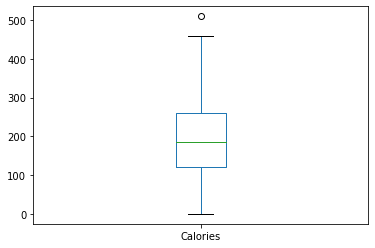

In [20]:
my_df['Calories'].plot(kind="box");

In [21]:
my_df['Calories'].describe()

count    242.000000
mean     193.871901
std      102.863303
min        0.000000
25%      120.000000
50%      185.000000
75%      260.000000
max      510.000000
Name: Calories, dtype: float64

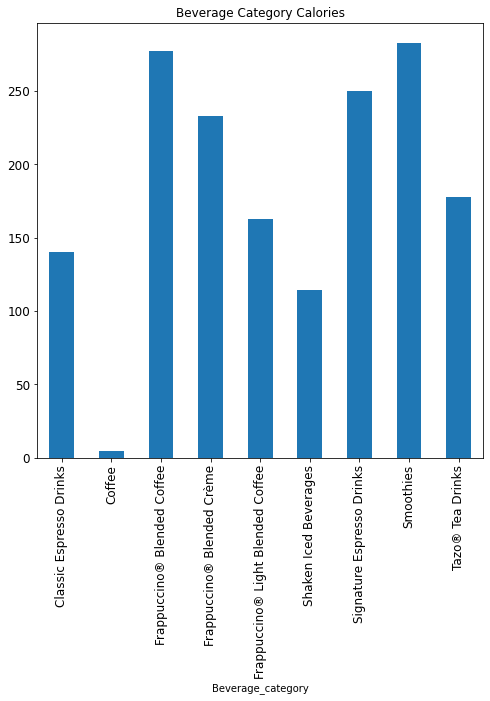

In [22]:
my_df.groupby('Beverage_category')['Calories'].mean().plot(kind='bar',title="Beverage Category Calories",figsize=(8,8),fontsize=12);

## Highest Sugar Drink ?

In [23]:
 my_df.loc[my_df['Sugar'].idxmax()]

Beverage_category          Frappuccino® Blended Coffee
Beverage             Java Chip (Without Whipped Cream)
Calories                                           420
Sugar                                               84
Name: 214, dtype: object

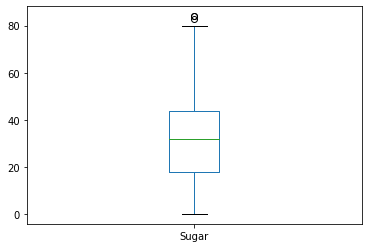

In [24]:
my_df['Sugar'].plot(kind="box");

In [25]:
my_df['Sugar'].describe()

count    242.000000
mean      32.962810
std       19.730199
min        0.000000
25%       18.000000
50%       32.000000
75%       43.750000
max       84.000000
Name: Sugar, dtype: float64

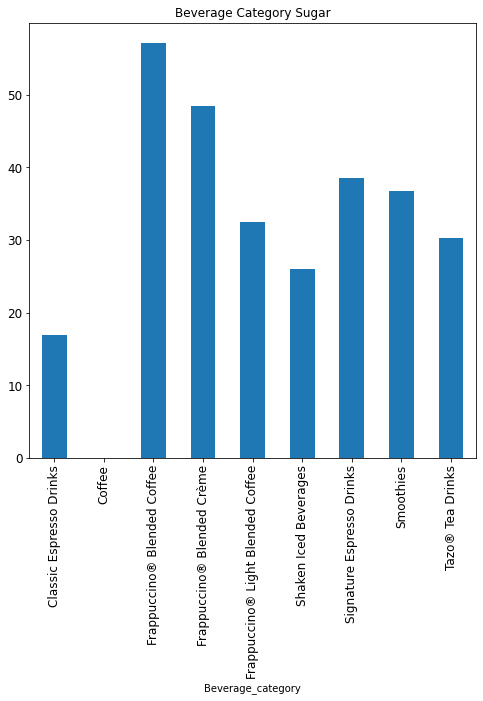

In [26]:
my_df.groupby('Beverage_category')['Sugar'].mean().plot(kind='bar',title="Beverage Category Sugar",figsize=(8,8),fontsize=12);

G

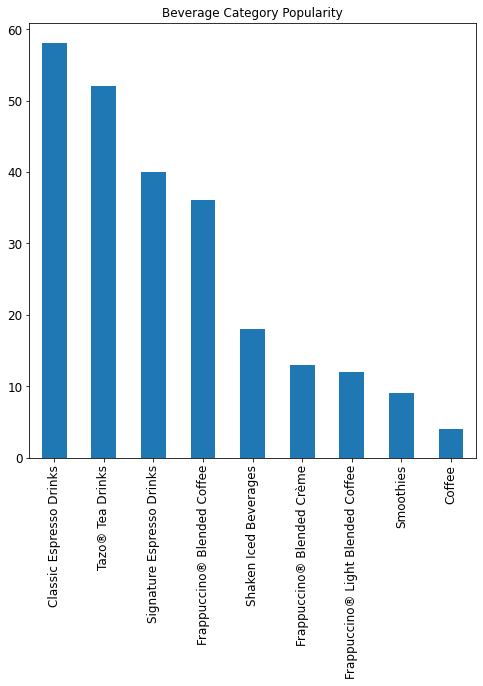

In [27]:
my_df.Beverage_category.value_counts().plot(kind = 'bar',figsize=(8,8),fontsize=12,title="Beverage Category Popularity"); #most popular category

Classic Espresso Drinks are the most popular beverages in general, second lowest in sugar and below average calories.<br/>
Least popular is coffee which is lowest in both sugar and calories.

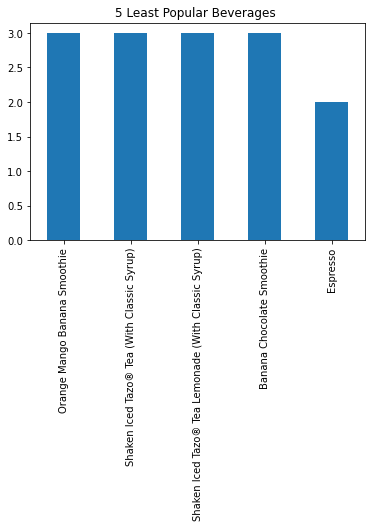

In [28]:
my_df.Beverage.value_counts().tail(5).plot(kind = 'bar',title="5 Least Popular Beverages "); #most popular category

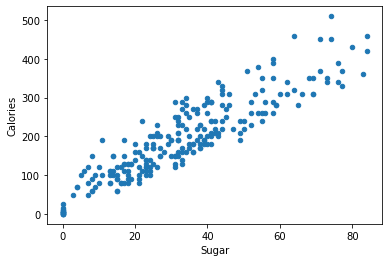

In [29]:
my_df.plot(kind="scatter",x="Sugar",y="Calories");

Positive correlation can be seen between beverage's suagr and calories.